(example_01_quotients_of_s2_trivial)=

# Quotients $(\mathbb{S}^{2}\times\mathbb{S}^{1})/\mathbb{Z}_{2}$ As Circle Bundles Over $\mathbb{RP}^{2}$ 

Consider the trivial circle bundle over $\mathbb{S}^{2}$ defined by the projection of the product $\mathbb{S}^{2}\times\mathbb{S}^{1}$ onto the first factor.  We define three quotient metrics on $\mathbb{S}^{2}\times\mathbb{S}^{1}$ corresponding to three different $\mathbb{Z}_{2}$-actions covering the antipodal map on $\mathbb{S}^{2}$:

$\textbf{1.}$ $(v,z)\cdot (-1) := (-v,z)$

$\textbf{2.}$ $(v,z)\cdot (-1) := (-v,-z)$

$\textbf{3.}$ $(v,z)\cdot (-1) := (-v,\bar{z})$

In each case, we obtain an induced circle bundle over $\mathbb{RP}^{2}$.  The quotient induced by $\textbf{1}$ above yields the trivial bundle; $\textbf{2}$ yields the (unique) non-trivial orientable circle bundle over $\mathbb{RP}^{2}$, and $\textbf{3}$ yields the non-orientable circle bundle over $\mathbb{RP}^{2}$ with (twisted) Euler number 0.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import circle_bundles as cb

First, generate a sample of the product $\mathbb{S}^{2}\times\mathbb{S}^{1}$ as vectors in $\mathbb{R}^{5}$:

In [2]:
n_samples = 5000
sigma = 0.05  #noise level

data, base_points, angles = cb.sample_s2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)

Next, construct a (good) cover of $\mathbb{RP}^{2}$ using nearly-equidistant landmark points (see reference section for details):

### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 237$
- $\#(\text{2-simplices}) = 158$
- *No recorded simplices in dimensions* $\ge 3$

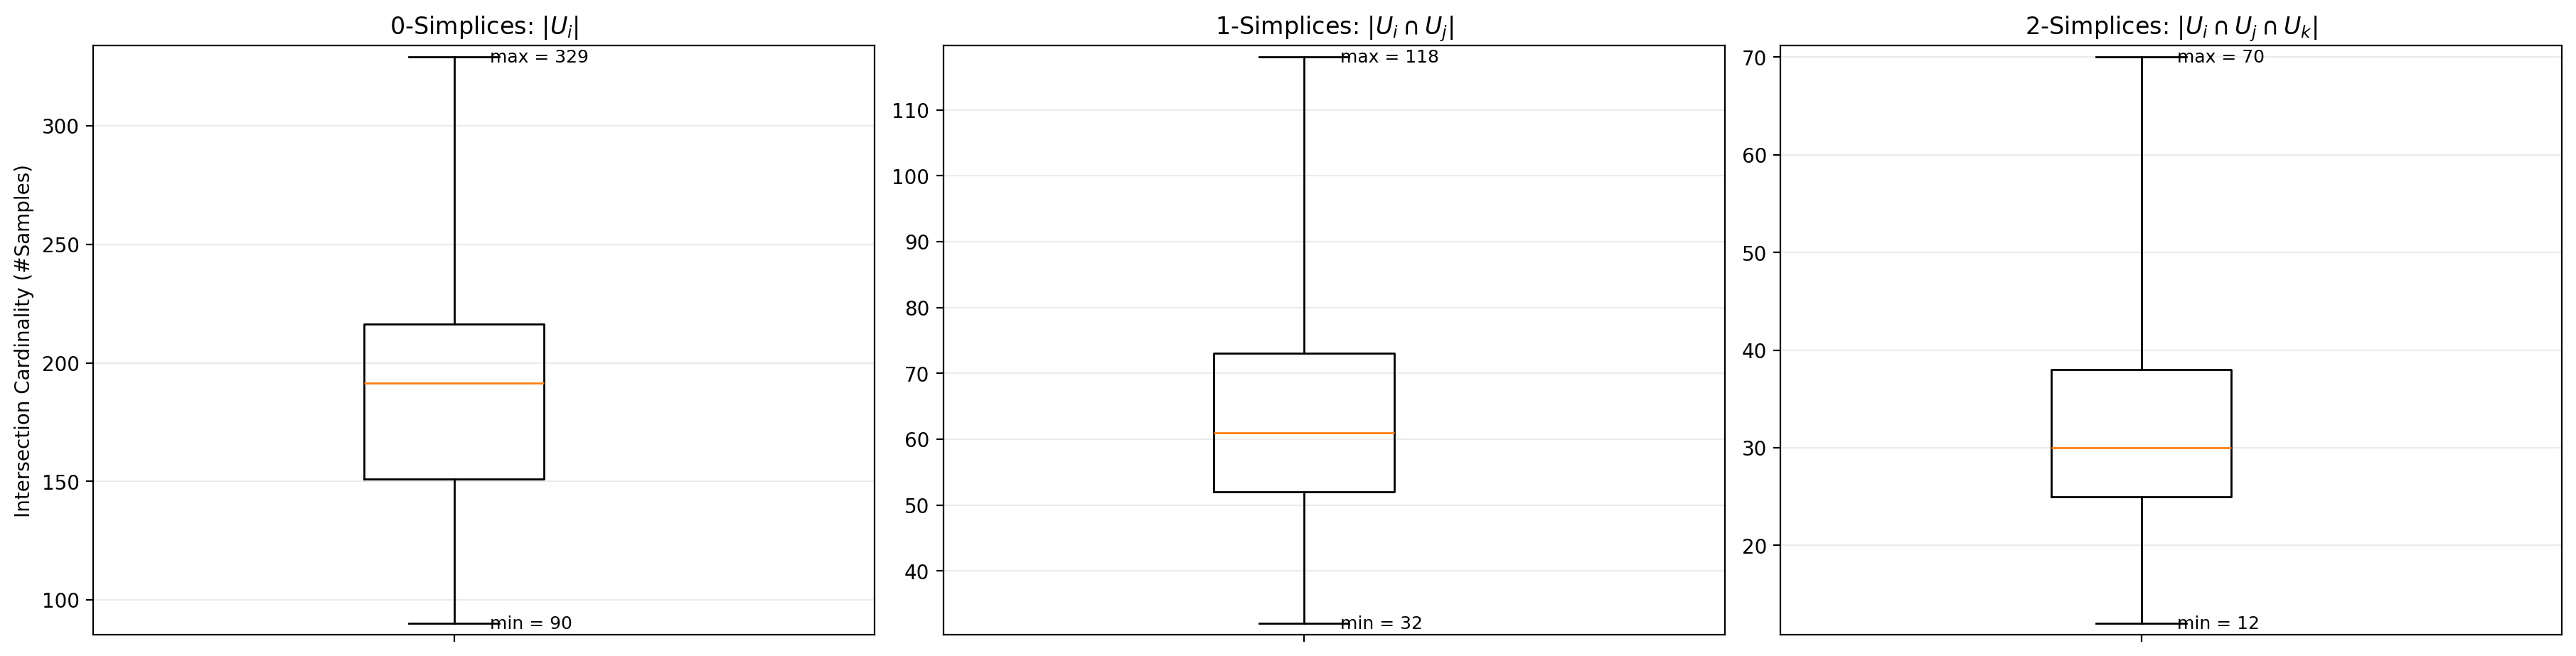

In [3]:
n_landmarks = 80
rp2_cover = cb.get_rp2_fibonacci_cover(base_points, n_pairs = n_landmarks)
bundle = cb.Bundle(X = data, cover= rp2_cover, show_summary = True)

Observe that the Euler characteristic of the nerve of our (good) open cover is $\chi = 80 - 237 + 158 = 1$, as expected for $\mathbb{RP}^{2}$.

Now, choose a quotient metric for the dataset and compute local trivializations and classes:

In [7]:
total_metrics = [cb.RP2_TrivialMetric(), cb.RP2_TwistMetric(), cb.RP2_FlipMetric()]  

j = 2   #CHOOSE: a metric on the total space
total_metric = total_metrics[j]


bundle.total_metric = total_metric 

local_triv_result = bundle.get_local_trivs(show_summary = True)
class_result = bundle.get_classes(show_summary = True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Try switching the metric to see how the class results change.  

Note the difference in class persistence results: we expect an orientable cocycle to become a coboundary after a single edge is removed from the nerve, but a non-orientable cocycle over $\mathbb{RP}^{2}$ may have a much longer 'lifetime.' The restriction of the total space of a non-orientable bundle over $\mathbb{RP}^{2}$ to any 'equator' $\mathbb{RP}^{1}\subset\mathbb{RP}^{2}$ is still non-trivial, so the maximal subcomplex of the nerve on which a representative cocycle restricts to a coboundary cannot have any non-trivial cycles.  

Optionally run the cell below to see an interactive visualization of the weights filtration on the nerve of the cover.  Use the slider to see different stages of weights filtration.  Edges shown in red are removed to reach a subcomplex on which both characterstic class representatives become coboundaries.  

In [ ]:
fig = bundle.show_nerve(show_labels = False)  #change to True to see set labels
plt.show()